In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import spacy
import nltk
import re
import string
import pandas as pd
import numpy as np
from stop_word_list import *
# from clean_text impfort *
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import json
%matplotlib inline

%run nlp_topic_utils.ipynb


In [4]:
df=pd.read_csv('articles_corpus_full.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article_id,link,content,title,month,year
0,1,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The last time Laxmi Chandra came to...,Revamped Central Vista opens to the public | D...,9,2022
1,2,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: Delhi Traffic Police has made elabo...,Free Delhi Metro e-bus service to Central Vist...,9,2022
2,3,https://timesofindia.indiatimes.com/city/pune/...,PUNE: The Vista Dome coaches on Central Railwa...,Vistadome coaches in all Central Railway train...,10,2022
3,4,https://timesofindia.indiatimes.com/city/chand...,CHANDIGARH: Taking strong note of delay in con...,Railway yard officials pulled up for delay in ...,11,2022
4,5,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The government will dispense with t...,Delhi: Access to govt offices in Central Vista...,8,2022


In [6]:
df=df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import nltk
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
df['processed_text'] = df['content'].apply(process_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
clean_text = pd.DataFrame(df.processed_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
clean_text.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,processed_text
0,"[new, delhi, last, time, laxmi, chandra, came,..."
1,"[new, delhi, delhi, traffic, police, made, ela..."
2,"[pune, vista, dome, coach, central, railway, r..."
3,"[chandigarh, taking, strong, note, delay, cond..."
4,"[new, delhi, government, dispense, current, sy..."


In [11]:
pip install sacremoses

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=82d08267a2495c0231fdff0a1aee9731e3ee07891fac3db2e7f0d2146f52fa2d
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses


In [12]:
from sacremoses import MosesDetokenizer,MosesTokenizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
mt = MosesDetokenizer(lang='en')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['detoken']=df['processed_text'].apply(lambda x: mt.detokenize(x, return_str=True))


In [15]:
df['detoken']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       new delhi last time laxmi chandra came india g...
1       new delhi delhi traffic police made elaborate ...
2       pune vista dome coach central railway received...
3       chandigarh taking strong note delay conducting...
4       new delhi government dispense current system i...
                              ...                        
1145    revamped lawn rajpath india gate known central...
1146    redevelopment project central vista avenue str...
1147    fire broke monday three temporary shelter work...
1148    ahluwalia contract india limited tuesday emerg...
1149    new loop corridor spanning km proposed heart n...
Name: detoken, Length: 1150, dtype: object

In [16]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df.detoken])
# Filter only those that occur at least 35 times
finder.apply_freq_filter(35)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in df.detoken])
# Filter only those that occur at least 35 times
finder.apply_freq_filter(35)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
bigram_pmi.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bigram,pmi
0,"(ice, cream)",12.629614
1,"(sohail, hashmi)",12.538466
2,"(larsen, toubro)",12.509320
3,"(anya, malhotra)",12.452736
4,"(syndicated, feed)",12.222439
5,"(criminal, wastage)",12.071646
6,"(uttar, pradesh)",11.822478
7,"(king, george)",11.717992
8,"(raisina, hill)",11.704858
9,"(dinesh, maheshwari)",11.687884


In [21]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_word_list or bigram[1] in stop_word_list:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_word_list or trigram[-1] in stop_word_list or trigram[1] in stop_word_list:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [24]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                 trigram_filter(trigram['trigram'])\
                                                 and trigram.pmi > 5, axis = 1)][:500]


bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
bigrams = [' '.join(x) for x in bigram_pmi.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in trigram_pmi.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
bigram_pmi[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bigram,pmi
0,"(ice, cream)",12.629614
1,"(sohail, hashmi)",12.538466
2,"(larsen, toubro)",12.509320
3,"(anya, malhotra)",12.452736
4,"(syndicated, feed)",12.222439
5,"(criminal, wastage)",12.071646
6,"(uttar, pradesh)",11.822478
7,"(king, george)",11.717992
8,"(raisina, hill)",11.704858
9,"(dinesh, maheshwari)",11.687884


In [27]:
# examples of bigrams
bigrams[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ice cream',
 'sohail hashmi',
 'larsen toubro',
 'anya malhotra',
 'syndicated feed',
 'criminal wastage',
 'uttar pradesh',
 'king george',
 'raisina hill',
 'dinesh maheshwari']

In [28]:
# examples of trigrams
trigrams[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['subhas chandra bose',
 "live update party's",
 'theprint hold responsibility',
 'larsen toubro limited',
 'netaji subhas chandra',
 'share related topic',
 'command decide himachal',
 'result live update',
 'hold responsibility content',
 'decide himachal cm']

In [29]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
reviews_w_ngrams = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
reviews_w_ngrams

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article_id,link,content,title,month,year,processed_text,detoken
0,1,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The last time Laxmi Chandra came to...,Revamped Central Vista opens to the public | D...,9,2022,"[new, delhi, last, time, laxmi, chandra, came,...",new delhi last time laxmi chandra came india g...
1,2,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: Delhi Traffic Police has made elabo...,Free Delhi Metro e-bus service to Central Vist...,9,2022,"[new, delhi, delhi, traffic, police, made, ela...",new delhi delhi traffic police made elaborate ...
2,3,https://timesofindia.indiatimes.com/city/pune/...,PUNE: The Vista Dome coaches on Central Railwa...,Vistadome coaches in all Central Railway train...,10,2022,"[pune, vista, dome, coach, central, railway, r...",pune vista dome coach central railway received...
3,4,https://timesofindia.indiatimes.com/city/chand...,CHANDIGARH: Taking strong note of delay in con...,Railway yard officials pulled up for delay in ...,11,2022,"[chandigarh, taking, strong, note, delay, cond...",chandigarh taking strong note delay conducting...
4,5,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The government will dispense with t...,Delhi: Access to govt offices in Central Vista...,8,2022,"[new, delhi, government, dispense, current, sy...",new delhi government dispense current system i...
...,...,...,...,...,...,...,...,...
1145,1146,https://www.business-standard.com/article/curr...,"The revamped lawns of Rajpath and India Gate, ...","Central Vista project: Rajpath, India Gate to ...",6,2022,"[revamped, lawn, rajpath, india, gate, known, ...",revamped lawn rajpath india gate known central...
1146,1147,https://www.business-standard.com/article/curr...,The redevelopment project of the Central Vista...,Central Vista Avenue project to be completed i...,6,2022,"[redevelopment, project, central, vista, avenu...",redevelopment project central vista avenue str...
1147,1148,https://www.business-standard.com/article/curr...,A fire broke out on Monday in three temporary ...,Fire in shelters for workers near Parliament H...,6,2022,"[fire, broke, monday, three, temporary, shelte...",fire broke monday three temporary shelter work...
1148,1149,https://www.business-standard.com/article/curr...,Ahluwalia Contracts India Limited on Tuesday e...,Central Vista: Ahluwalia Contracts lowest bidd...,3,2022,"[ahluwalia, contract, india, limited, tuesday,...",ahluwalia contract india limited tuesday emerg...


In [32]:
reviews_w_ngrams['reviewText']=np.nan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
reviews_w_ngrams

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article_id,link,content,title,month,year,processed_text,detoken,reviewText
0,1,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The last time Laxmi Chandra came to...,Revamped Central Vista opens to the public | D...,9,2022,"[new, delhi, last, time, laxmi, chandra, came,...",new delhi last time laxmi chandra came india g...,NaN
1,2,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: Delhi Traffic Police has made elabo...,Free Delhi Metro e-bus service to Central Vist...,9,2022,"[new, delhi, delhi, traffic, police, made, ela...",new delhi delhi traffic police made elaborate ...,NaN
2,3,https://timesofindia.indiatimes.com/city/pune/...,PUNE: The Vista Dome coaches on Central Railwa...,Vistadome coaches in all Central Railway train...,10,2022,"[pune, vista, dome, coach, central, railway, r...",pune vista dome coach central railway received...,NaN
3,4,https://timesofindia.indiatimes.com/city/chand...,CHANDIGARH: Taking strong note of delay in con...,Railway yard officials pulled up for delay in ...,11,2022,"[chandigarh, taking, strong, note, delay, cond...",chandigarh taking strong note delay conducting...,NaN
4,5,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The government will dispense with t...,Delhi: Access to govt offices in Central Vista...,8,2022,"[new, delhi, government, dispense, current, sy...",new delhi government dispense current system i...,NaN
...,...,...,...,...,...,...,...,...,...
1145,1146,https://www.business-standard.com/article/curr...,"The revamped lawns of Rajpath and India Gate, ...","Central Vista project: Rajpath, India Gate to ...",6,2022,"[revamped, lawn, rajpath, india, gate, known, ...",revamped lawn rajpath india gate known central...,NaN
1146,1147,https://www.business-standard.com/article/curr...,The redevelopment project of the Central Vista...,Central Vista Avenue project to be completed i...,6,2022,"[redevelopment, project, central, vista, avenu...",redevelopment project central vista avenue str...,NaN
1147,1148,https://www.business-standard.com/article/curr...,A fire broke out on Monday in three temporary ...,Fire in shelters for workers near Parliament H...,6,2022,"[fire, broke, monday, three, temporary, shelte...",fire broke monday three temporary shelter work...,NaN
1148,1149,https://www.business-standard.com/article/curr...,Ahluwalia Contracts India Limited on Tuesday e...,Central Vista: Ahluwalia Contracts lowest bidd...,3,2022,"[ahluwalia, contract, india, limited, tuesday,...",ahluwalia contract india limited tuesday emerg...,NaN


In [34]:
reviews_w_ngrams.reviewText = reviews_w_ngrams.detoken.map(lambda x: replace_ngram(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
reviews_w_ngrams['token']=np.nan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
reviews_w_ngrams['token']= reviews_w_ngrams.reviewText.map(lambda x: [word for word in x.split()\
                                                 if word not in stop_word_list\
                                                              and word not in english_names\
                                                              and len(word) > 2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
reviews_w_ngrams.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article_id,link,content,title,month,year,processed_text,detoken,reviewText,token
0,1,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The last time Laxmi Chandra came to...,Revamped Central Vista opens to the public | D...,9,2022,"[new, delhi, last, time, laxmi, chandra, came,...",new delhi last time laxmi chandra came india g...,new_delhi last time laxmi chandra came india_g...,"[new_delhi, time, laxmi, came, india_gate, are..."
1,2,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: Delhi Traffic Police has made elabo...,Free Delhi Metro e-bus service to Central Vist...,9,2022,"[new, delhi, delhi, traffic, police, made, ela...",new delhi delhi traffic police made elaborate ...,new_delhi delhi traffic_police made elaborate ...,"[new_delhi, delhi, traffic_police, elaborate, ..."
2,3,https://timesofindia.indiatimes.com/city/pune/...,PUNE: The Vista Dome coaches on Central Railwa...,Vistadome coaches in all Central Railway train...,10,2022,"[pune, vista, dome, coach, central, railway, r...",pune vista dome coach central railway received...,pune vista dome coach central railway received...,"[pune, vista, dome, coach, central, railway, r..."
3,4,https://timesofindia.indiatimes.com/city/chand...,CHANDIGARH: Taking strong note of delay in con...,Railway yard officials pulled up for delay in ...,11,2022,"[chandigarh, taking, strong, note, delay, cond...",chandigarh taking strong note delay conducting...,chandigarh taking strong note delay conducting...,"[chandigarh, taking, strong, note, delay, cond..."
4,5,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The government will dispense with t...,Delhi: Access to govt offices in Central Vista...,8,2022,"[new, delhi, government, dispense, current, sy...",new delhi government dispense current system i...,new_delhi_government dispense current system i...,"[new_delhi_government, dispense, current, issu..."


## NMF model

In [38]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Get the top 20 most common words among all the articles
p_text = reviews_w_ngrams['token']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,word,frequency
0,project,2233
1,government,1437
2,building,1262
3,new,847
4,india,837
5,delhi,836
6,work,808
7,area,795
8,central_vista,787
9,public,769


In [40]:
num_unique_words = len(set(p_text))
num_unique_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


17192

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `s

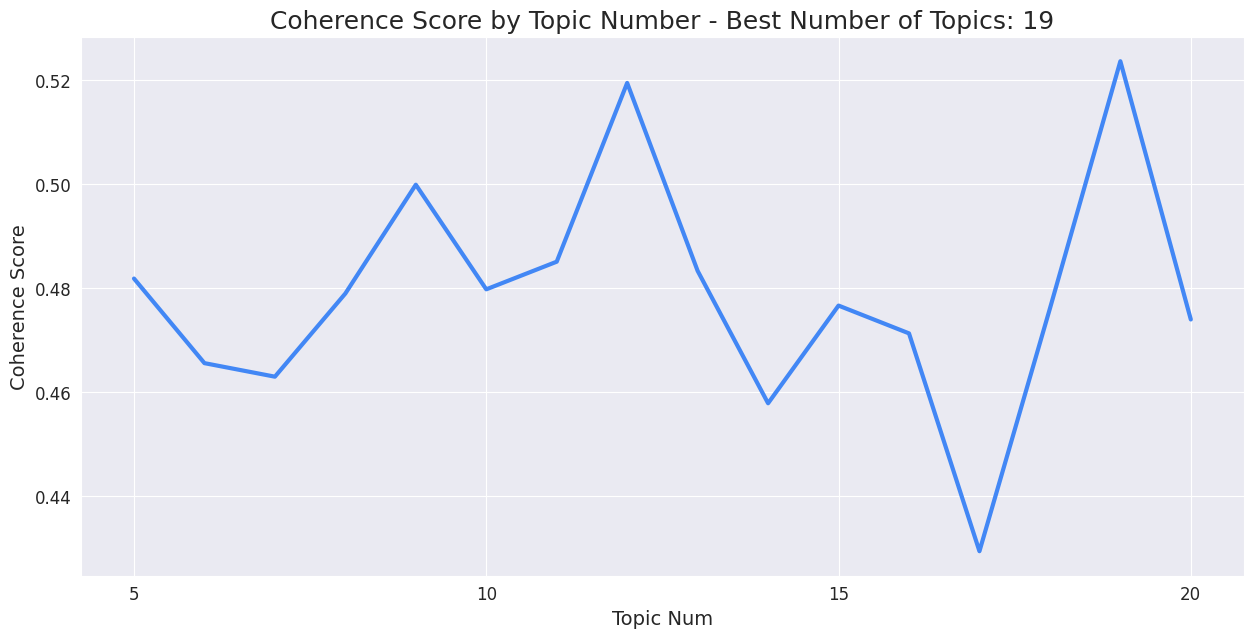

In [42]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = reviews_w_ngrams['token']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 20 + 1, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_score'

fig.savefig(
    file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [43]:
texts = reviews_w_ngrams['token']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    # n_components=20,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    # alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 3

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,topics
0,building,architect,project,building architect project
1,bench,plea,dda,bench plea dda
2,kartavya_path,statue,india_gate,kartavya_path statue india_gate
3,bid,cpwd,qualification,bid cpwd qualification
4,petitioner,plea,high_court,petitioner plea high_court
5,tree,transplantation,transplanted,tree transplantation transplanted
6,congress,government,covid,congress government covid
7,road,hexagon,traffic,road hexagon traffic
8,seat,approval,start,seat approval start
9,birla,new_building,new_parliament_building,birla new_building new_parliament_building


## LDA Model

In [45]:
dictionary = corpora.Dictionary(reviews_w_ngrams['token'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in reviews_w_ngrams['token']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Optimize # of k topics

In [47]:
coherence = []
for k in range(5,15):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
                   iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=reviews_w_ngrams['token'],
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14


In [48]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


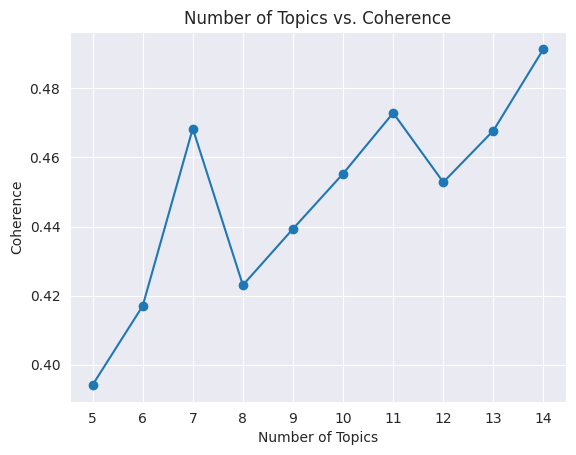

In [49]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

The improvement stops to significantly improve after 15 topics. We'll try 7 and 13 here. Adding topics can help reveal further sub topics. Nonetheless, if the same words start to appear across multiple topics, the number of topics is too high.

In [51]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(doc_term_matrix, num_topics=13, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Some explanation of the parameters that can be tuned:
- Passes: The number of times model iterates through the whole corpus
- Iterations: The number of iterations the model trains on each pass
- Chunk size: Number of rows that are taken to train the model each 



In [52]:
# To show initial topics
ldamodel.show_topics(7, num_words=20, formatted=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('project', 0.0184348),
   ('petitioner', 0.013181274),
   ('court', 0.009833766),
   ('plea', 0.008909182),
   ('petition', 0.008872057),
   ('centre', 0.007925018),
   ('supreme_court', 0.0070558297),
   ('government', 0.0068222084),
   ('hearing', 0.006822137),
   ('bench', 0.006619566),
   ('central_vista_project', 0.0065778135),
   ('matter', 0.0062769875),
   ('public', 0.005434772),
   ('high_court', 0.0053766347),
   ('case', 0.0053662783),
   ('covid', 0.004929975),
   ('order', 0.004718832),
   ('delhi', 0.004651288),
   ('work', 0.0042533157),
   ('worker', 0.004232277)]),
 (1,
  [('road', 0.020249607),
   ('traffic', 0.008878146),
   ('public', 0.008201367),
   ('central_vista', 0.006958378),
   ('police', 0.0059080734),
   ('delhi', 0.0049122833),
   ('marg', 0.0048774322),
   ('area', 0.004841269),
   ('bus', 0.004319221),
   ('india_gate', 0.0042106668),
   ('place', 0.0038938187),
   ('new_delhi', 0.003440743),
   ('added', 0.0032275475),
   ('roundabout', 0.003

In [54]:
# To show initial topics
lda7topics = pd.DataFrame(ldamodel.show_topics(7, num_words=20, formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


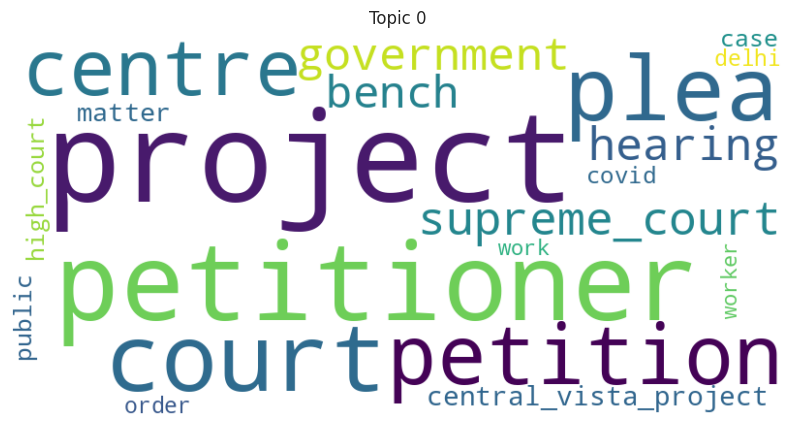

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


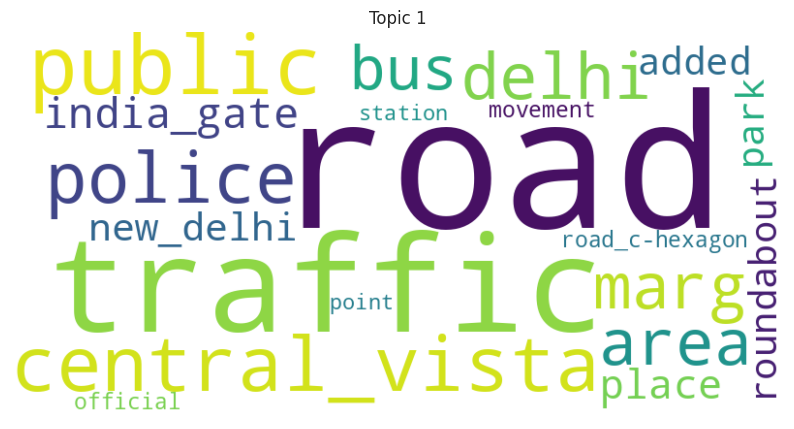

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


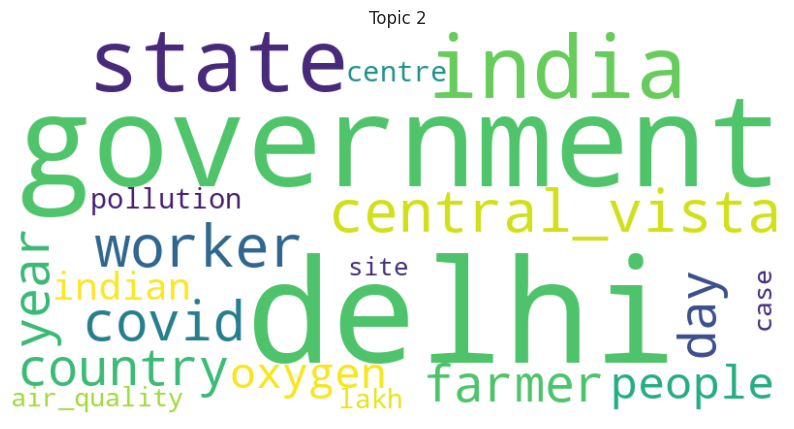

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


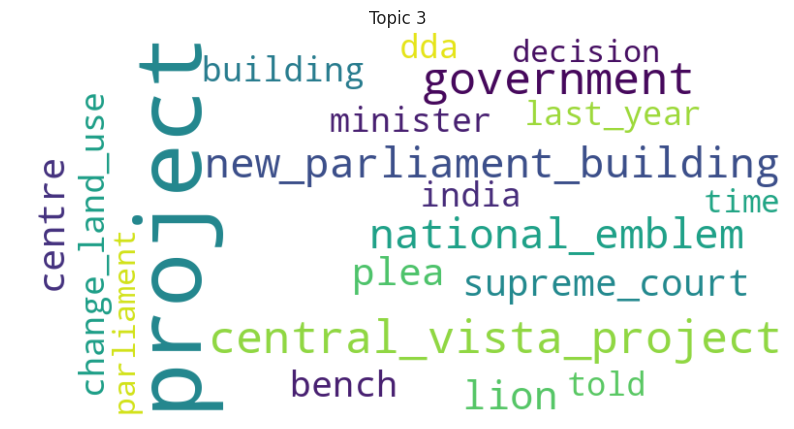

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


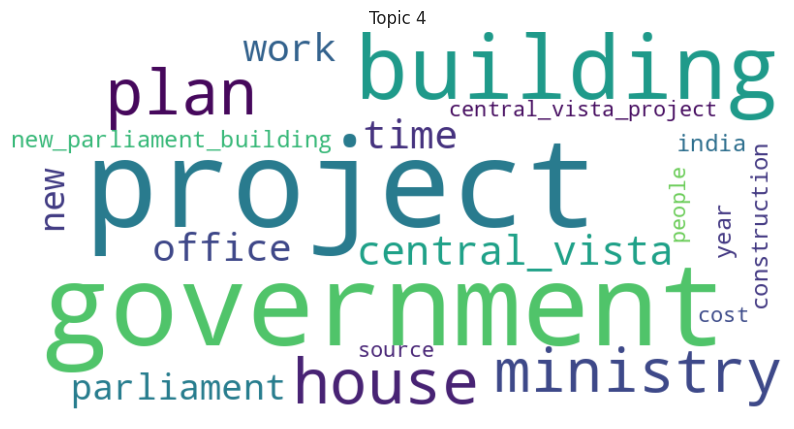

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


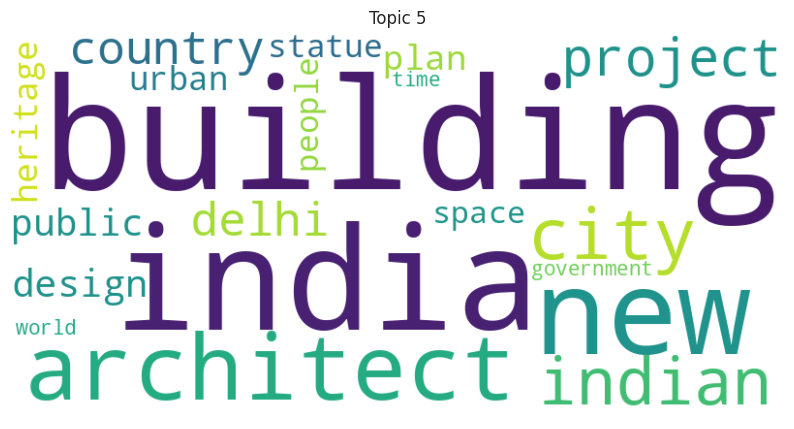

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


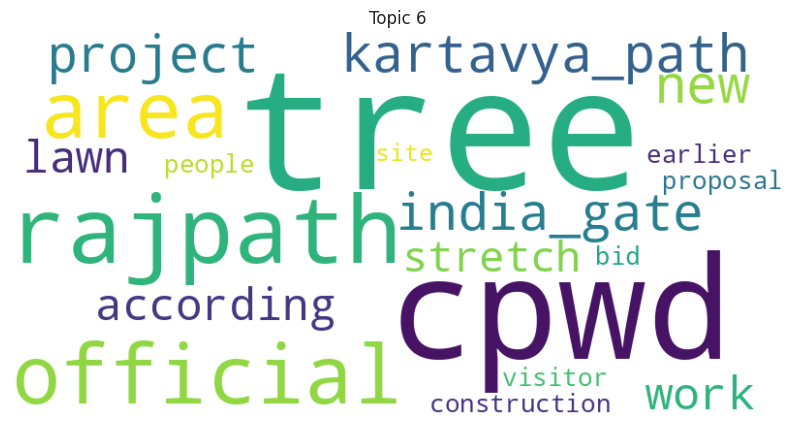

In [63]:
for index in range(7):


  # Generate word cloud for the topic
  topic_words_dict = {word: score for word, score in lda7topics[1][index]}
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words_dict)

  # Plot the word cloud
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Topic {index}')
  plt.show()

In [53]:

topic_scores = pd.DataFrame(ldamodel[doc_term_matrix])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_scores.to_csv("topic_scores_3.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# To show initial topics
ldamodel2.show_topics(13, num_words=15, formatted=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('project', 0.022380736),
   ('petitioner', 0.01821046),
   ('court', 0.013798622),
   ('petition', 0.013368459),
   ('plea', 0.011040121),
   ('supreme_court', 0.009587639),
   ('matter', 0.009209981),
   ('hearing', 0.008459624),
   ('bench', 0.008114752),
   ('high_court', 0.007546339),
   ('centre', 0.006948778),
   ('case', 0.006246898),
   ('central_vista_project', 0.0061253845),
   ('order', 0.0060469895),
   ('worker', 0.005768719)]),
 (1,
  [('public', 0.01546046),
   ('area', 0.007997414),
   ('recreational', 0.006450279),
   ('plot', 0.006343993),
   ('central_vista', 0.005618557),
   ('year', 0.0044818544),
   ('nwm', 0.004382942),
   ('proposed', 0.004367282),
   ('acre', 0.004112856),
   ('delhi', 0.0039856415),
   ('india', 0.0039656446),
   ('station', 0.0038310238),
   ('purpose', 0.0036657061),
   ('new', 0.0035552983),
   ('soldier', 0.0035180033)]),
 (2,
  [('delhi', 0.007974379),
   ('worker', 0.007546617),
   ('central_vista', 0.0064549833),
   ('construct

7 topics yielded clearer results, so we'll go with this...

In [68]:
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


To extract the words for a given lambda:

In [ ]:
topic_data2 =  pyLDAvis.gensim_models.prepare(ldamodel2, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

In [70]:
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,8): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
pd.DataFrame(all_topics).T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9
Topic 1,building,government,project,house,ministry,office,plan,time,parliament,new_parliament_building
Topic 2,tree,cpwd,kartavya_path,rajpath,india_gate,official,lawn,area,stretch,new
Topic 3,india,architect,building,city,indian,design,urban,art,new,architecture
Topic 4,petitioner,court,petition,project,plea,hearing,supreme_court,high_court,matter,bench
Topic 5,national_emblem,lion,cast,project,new_parliament_building,emblem,central_vista_project,kishore,notifying_change_master_plan,dda
Topic 6,farmer,air_quality,pollution,worker,delhi,state,oxygen,ncr,covid,ban
Topic 7,road,traffic,police,roundabout,road_c-hexagon,marg,bus,nwm,public,marg_c-hexagon
